<nav class="navbar navbar-default">
  <div class="container-fluid">
    <div class="navbar-header" style="float: left">
        <a class="navbar-brand" href="0_Index.ipynb" target="_self"> <h2> &uarr; Back to front page</h2></a>
    </div>
  </div>
</nav>

# Graphical analysis of an audio signal

It is time to use Python to conduct some more in-depth graphical analysis of our audio signal `sample_audio.wav`. Start by  running the code cell below which loads the contents of the audio file, and creates a scaled array `x` with sample values as floating-point numbers.

In [2]:
import scipy.io.wavfile as wavfile # Import module for handling of .wav audio files
from IPython.display import Audio  # Import the Audio object for use in audio playback
import numpy as np

fs, sampleData = wavfile.read("sample_audio.wav") # "fs" is sampling frequency, "sampleData" is the sequence of measurements
x = sampleData/max(abs(sampleData))               # Scale sample values to the range -1 < x[n] < 1

We now wish to analyze a short extract of the audio file to see if we can identif the fundamental frequency $f_0$ at around $t=12.3$ seconds.

## a)

Create a figure showing the signal $x(t)$ during the time interval $12.27s \leq t \leq 12.33s$. Use the same method as in task 3 to measure the fundamental period from the time plot. The plot should look something like [this](Figures/Task4_timeplot.png).

*Tip 1: In order to assure higher precision, measure the time over a larger number of repetitions (e.g. 5), and use this to calculate the average period* 

*Tip 2: The cell command `%matplotlib ipympl` enables interactive plots. You can now zoom in, or use the mouse cursor to get a relatively accurate reading of a point in the figure.<br>The downside to this is figues remaining "active" across code cells. Use the function `figure()` to create a new blank figure whenever you want to make a new plot.*

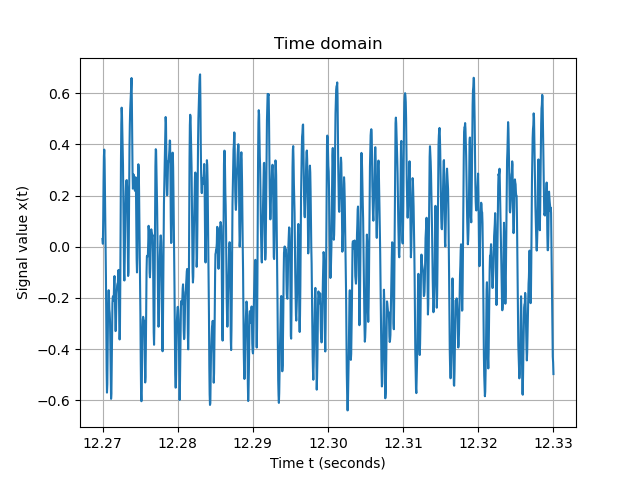

In [3]:
%matplotlib ipympl
import matplotlib.pyplot as plt

t0 = int(12.27*fs)
t1 = int(12.33*fs)

time = np.linspace(12.27,12.33, (t1-t0))

interval = x[t0:t1]

plt.plot(time, interval)
plt.xlabel("Time t (seconds)")
plt.ylabel("Signal value x(t)")
plt.title("Time domain")
plt.grid(True)

# WRITE YOUR CODE HERE:


ANSWER THEORY QUESTIONS HERE:

measuring the time between the two first peaks gives t0 = 12.273857, t1 = 12.282979. This is a difference of 0.0091 in seconds. That makes the fundemental freqency 1/0.0091 = 109.8901 Hz




Measuring the fundamental frequency based on the signal curve $x(t)$ can often be quite difficult, as it depends on us correctly identifying a repeating pattern. It is usually preferred to analyze the magnitude spectrum $|X(f)|$ instead, where a periodic signal manifests as a series of uniformly spaced "spikes".

## b)

Use the function [`matplotlib.pyplot.magnitude_spectrum()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.magnitude_spectrum.html) as introduced in task 3 to show the magnitude spectrum $|X(f)|$ of $x(t)$ for the same time interval $12.27s \leq t \leq 12.33s$. Measure the space between spikes to find the fundamental frequency. <br> *P.S. If we zoom in on the lower end of the frequency axis ($0Hz \leq f \leq 2000Hz$), the magnitude spectrum $|X(f)|$ should look something like [this](Figures/Task4_mag1.png).*


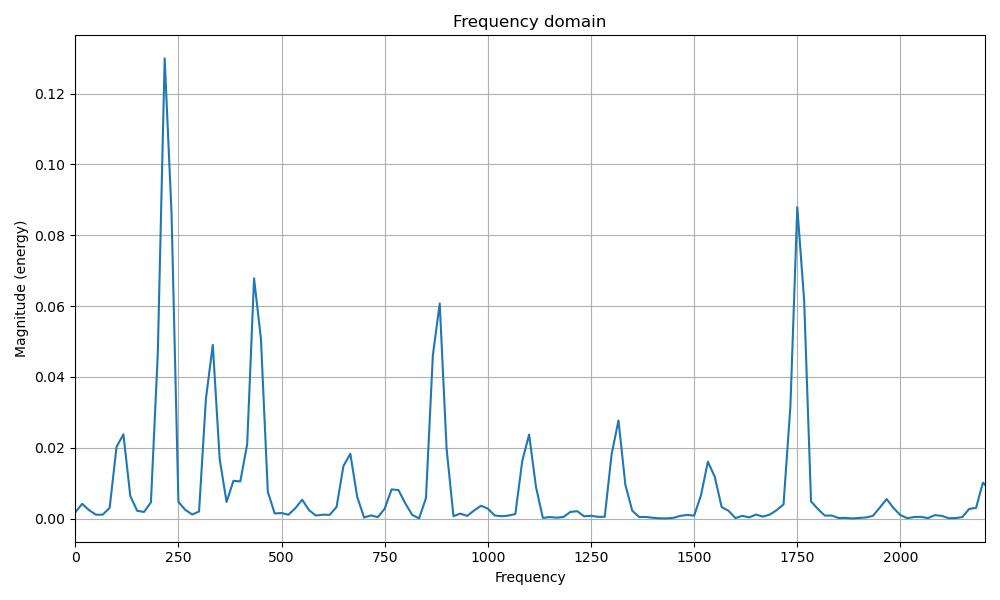

In [4]:
import matplotlib.pyplot as plt
%matplotlib ipympl


t0 = int(12.27*fs)
t1 = int(12.33*fs)

time = np.linspace(t0,t1, (t1-t0))

interval = x[t0:t1]

plt.figure(figsize=(10, 6))
plt.magnitude_spectrum(interval, Fs=fs)
plt.xlim([0, fs/10])  # Zoom in on x-axis
plt.title("Frequency domain")
plt.grid(True)
plt.tight_layout()

plt.show()
# WRITE YOUR CODE HERE:

ANSWER THEORY QUESTIONS HERE:

The first peak is at around 116.5, second at 216.7. third at 333.2 fourth at 433. General rule is that the first peak corresponds to the fundemental period. This makes the fundemental period around 116 hz, which is similar to the one found in the time domain analysis.



Our magnitude spectrum plot in task **b)**, while providing some good information appears to be quite jagged. This is because our *resolution* along the frequency axis depends on the lenght of the signal interval subject to frequency analysis. To get a more detailed magnitude spectrum, we can increase the analysis interval.

## c)

Create another plot of the magnitude spectrum $|X(f)|$, this time based on the values of $x(t)$ for $12.0\text{s} \leq t < 12.6\text{s}$. How does the increased resoution affect the magnitude spectrum plot?

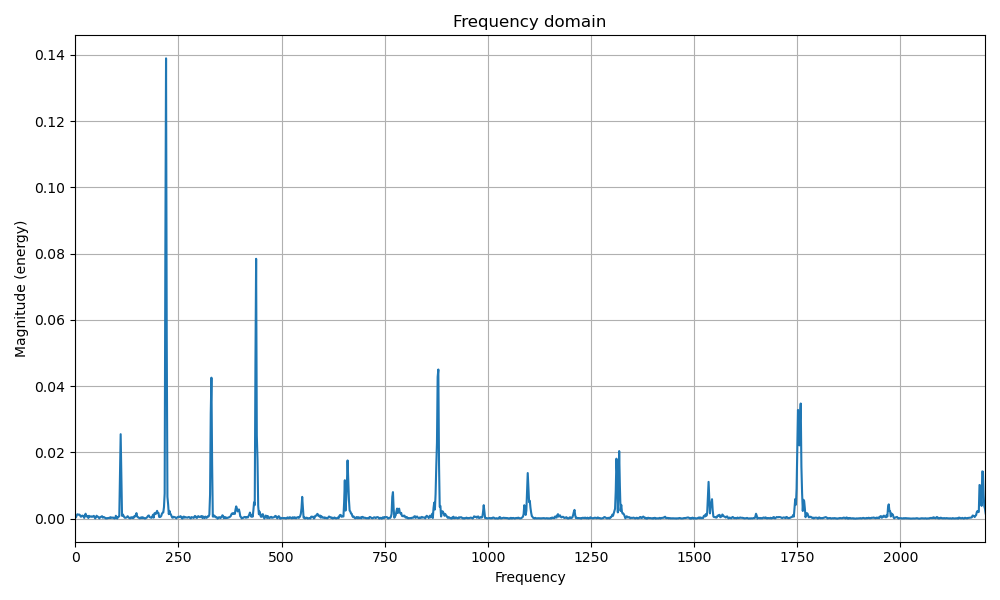

In [5]:
import matplotlib.pyplot as plt
%matplotlib ipympl

tc0 = int(12*fs)
tc1 = int(12.6*fs)

time_c = np.linspace(tc0,tc1, (tc1-tc0))

interval = x[tc0:tc1]

plt.figure(figsize=(10, 6))
plt.magnitude_spectrum(interval, Fs=fs)
plt.xlim([0, fs/10])  # Zoom in on x-axis
plt.title("Frequency domain")
plt.grid(True)
plt.tight_layout()

plt.show()
# WRITE YOUR CODE HERE:

ANSWER THEORY QUESTIONS HERE:

The increased resolution makes the peaks less jagged and more defined. This is because a longer signal has less uncertainty about which frequency is strongest. When the timestep is short, this uncertainty is increased.

Generally, higher frequency resolution is helpful when conducting frequency analysis. However, we also run the risk of "smearing" the frequency plot *if* the tone subject to analysis were to change during our analysis window. We also have no way of knowing whether the tone lasted the entire 0.6 seconds we analyzed, or only parts of it. In other words, there is always a tradeoff between frequency resolution and accuracy in the time domain. This is one manifestation of what is referred to as the uncertainty principle, which is explained beautifully in this [youtube-video](https://www.youtube.com/watch?v=MBnnXbOM5S4).

<br>
<nav class="navbar navbar-default">
  <div class="container-fluid">
    <div class="navbar-header" style="float: left">
      <a class="navbar-brand" href="3_sinusoids.ipynb" target="_self">&lt; Previous page: <i>Sinusoids and their frequency representation</i></a>
      </div>
            <div class="navbar-header" style="float: right">
      <a class="navbar-brand" href="5_audio_filtering.ipynb" target="_self">Next page: <i>Filtering of Audio Signals</i> &gt;</a>
  </div>
</nav>